<a href="https://colab.research.google.com/github/stepheodhiambo2000/Odhiambo_Machine_Learning/blob/main/PIMADIABETESDATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

In [ ]:
#Load CSV file using Pandas

pima = pd.read_csv(url)

In [ ]:
# Get row indices 

pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Get the column names 

pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
pima.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
# Create Nutritional status column 

Nutritional_status = pd.Series([]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Nutritional status based on BMI

for i in range(len(pima)): 
    if pima['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif pima['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif pima['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif pima['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i] 

In [ ]:
# Insert new column - Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [ ]:
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1


In [ ]:
pima['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

In [ ]:
pima.max()

Pregnancies                          17
Glucose                             199
BloodPressure                       122
SkinThickness                        99
Insulin                             846
BMI                                67.1
Nutritional Status          Underweight
DiabetesPedigreeFunction           2.42
Age                                  81
Outcome                               1
dtype: object

In [ ]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [ ]:
pima_all.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [ ]:
pima_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   Nutritional Status        392 non-null    object 
 7   DiabetesPedigreeFunction  392 non-null    float64
 8   Age                       392 non-null    int64  
 9   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 33.7+ KB


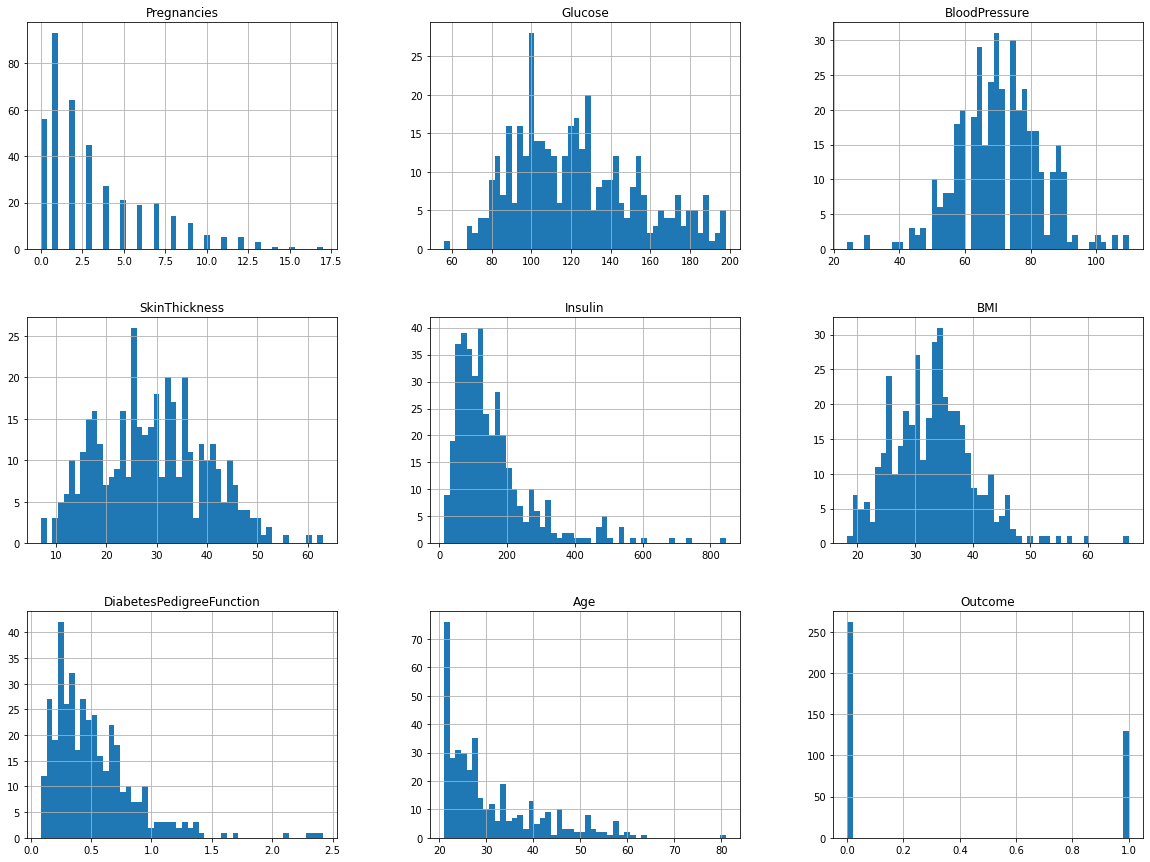

In [ ]:
# Histogram Represenation of data across all columns 
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

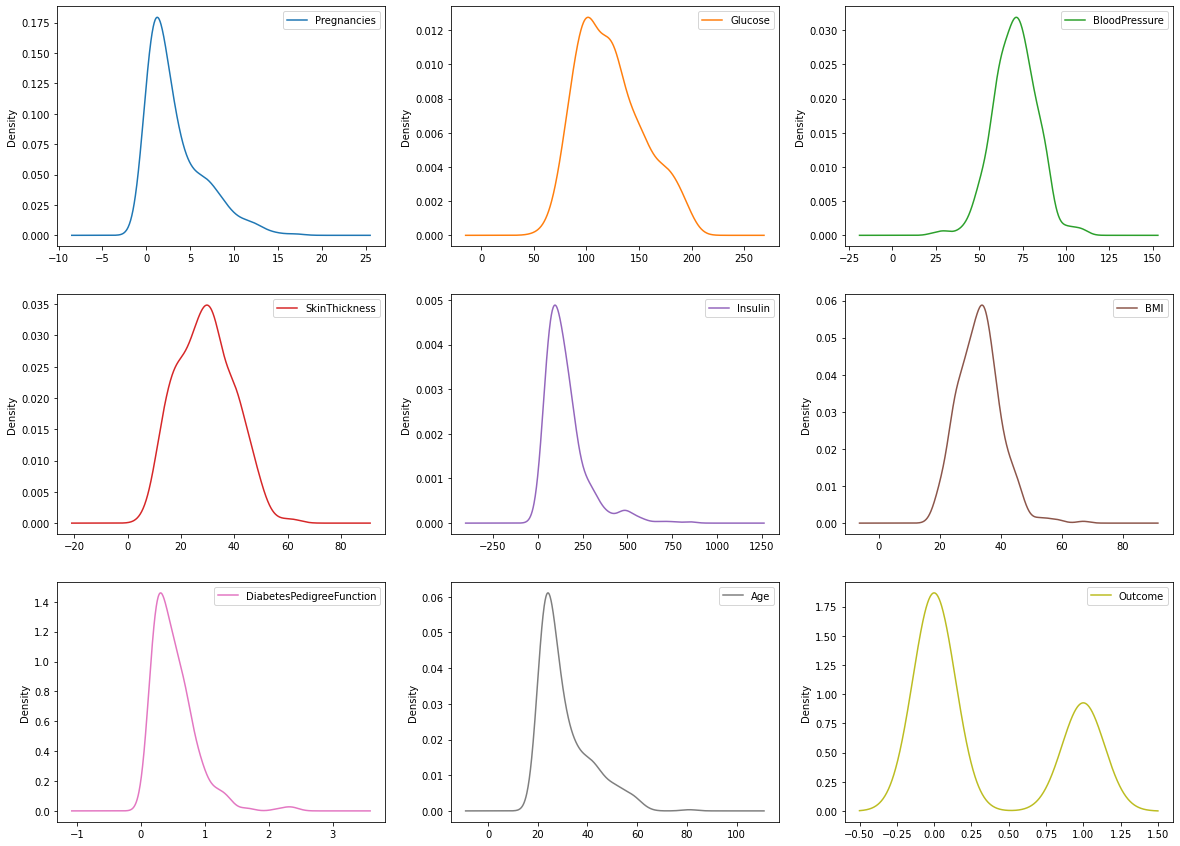

In [ ]:
# Density plots for all attributes to visualize the distribution of each attribute
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

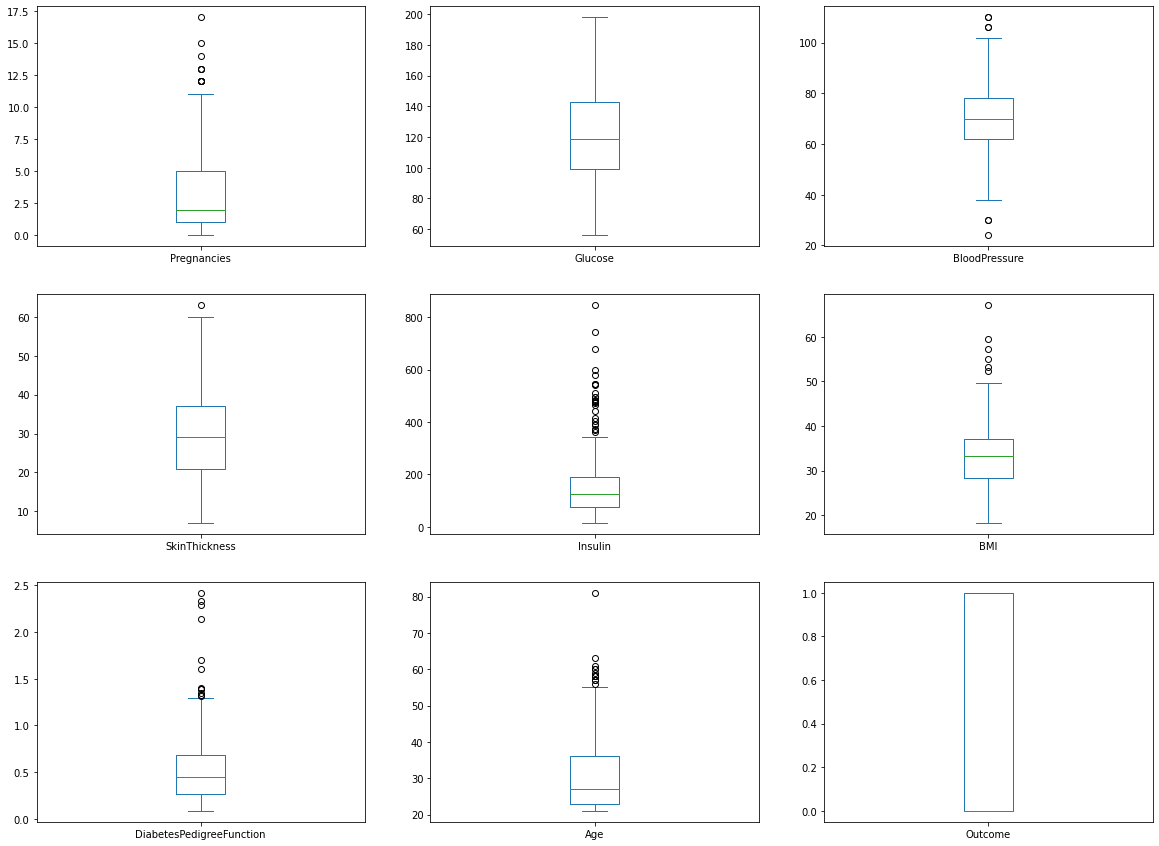

In [ ]:
#Box and Whisker plot to visualize the distribution of all atributes
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [ ]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.

corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


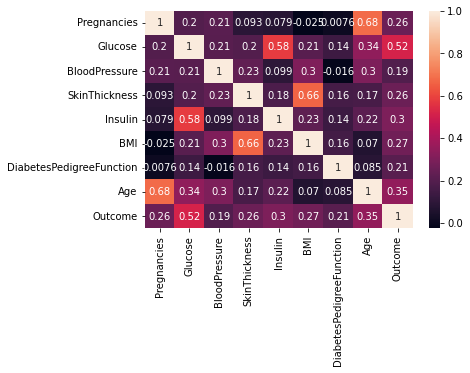

In [ ]:
sns.heatmap(corr_matrix_pearson, annot = True)

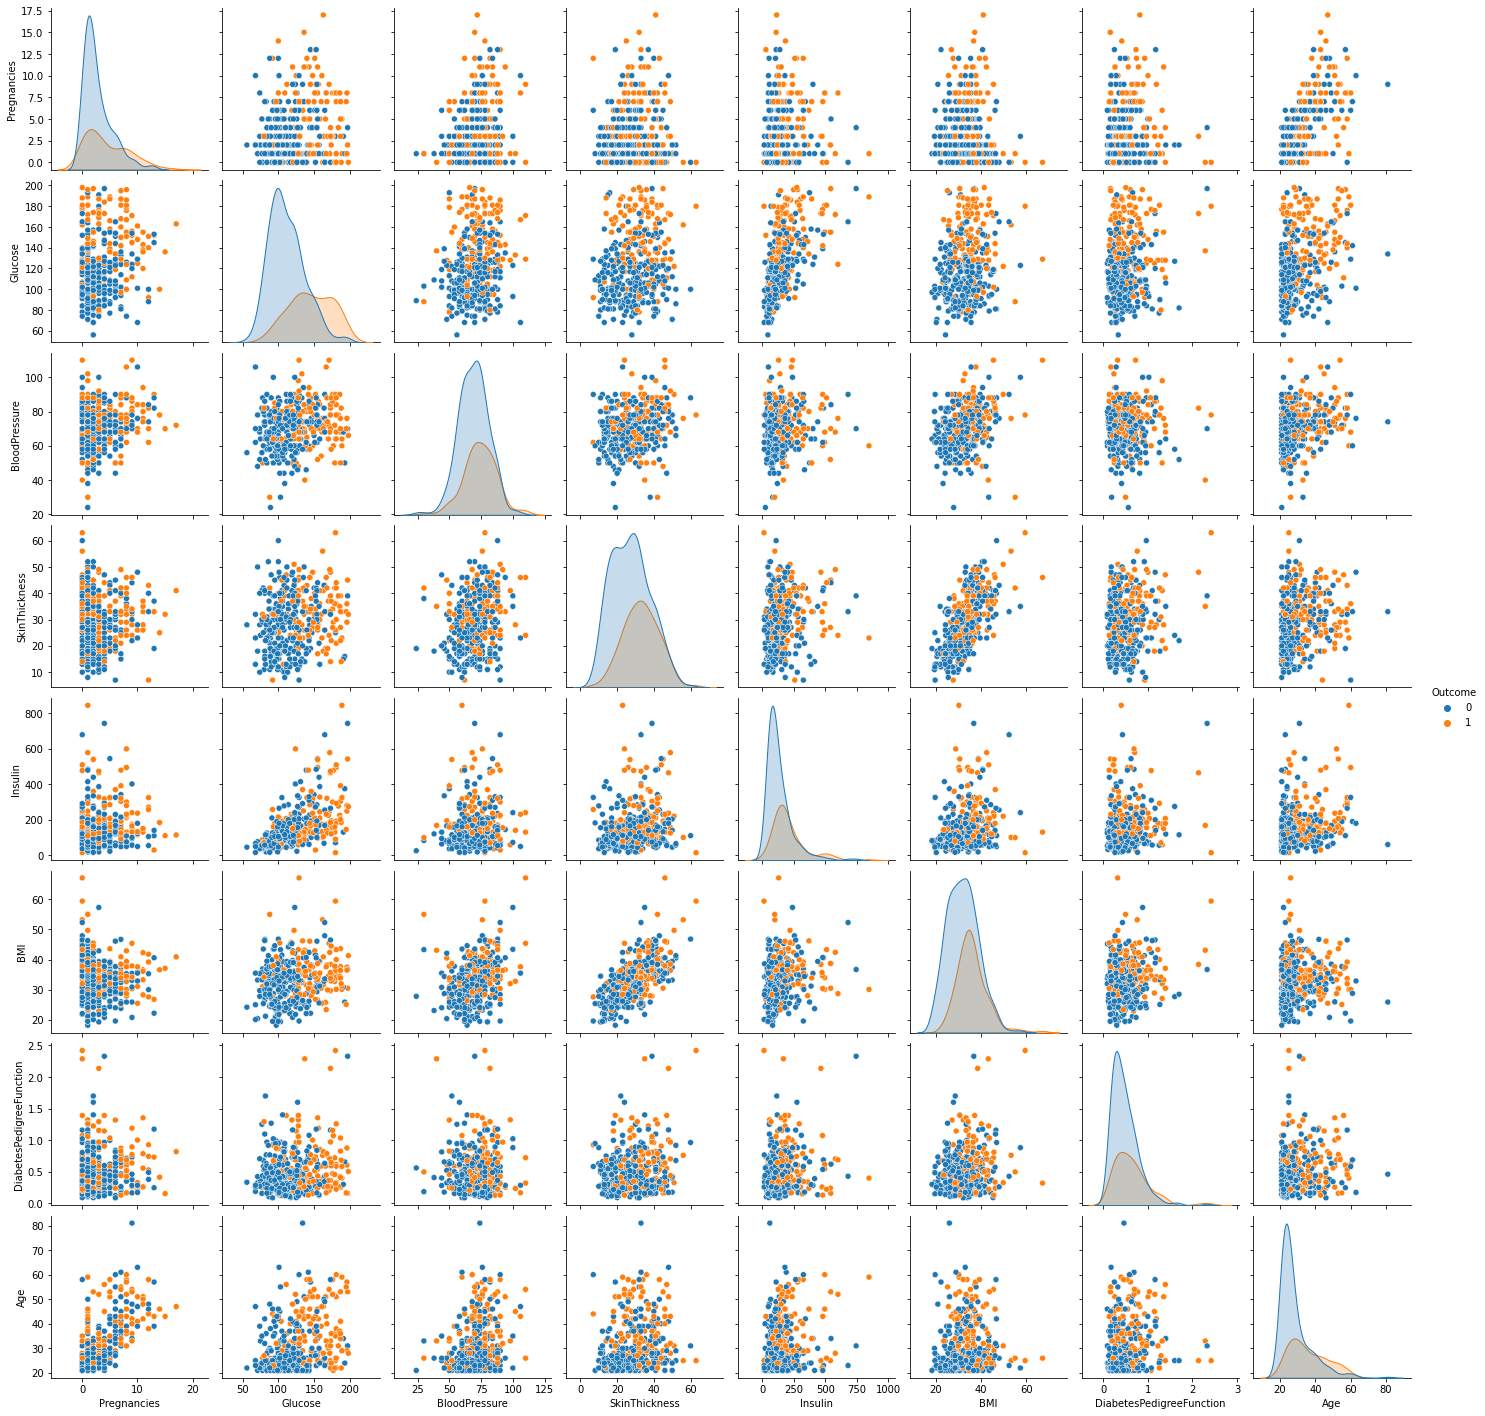

In [ ]:
# Pairplot

sns.pairplot(pima_all, hue='Outcome')

In [ ]:
#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=pima_all[var1]
y=pima_all.Outcome

In [ ]:
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 28 Jun 2022   Pseudo R-squ.:                  0.1128
Time:                        05:17:11   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

In [ ]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Tue, 28 Jun 2022   Pseudo R-squ.:                 0.09558
Time:                        05:17:55   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

In [ ]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
y=pima_all.Outcome
logreg.fit(X,y)

## Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X)

## Calculating the precision of the model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



In [ ]:
# Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, and the number of cases the model gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[229  33]
 [ 59  71]]


In [ ]:
#Classifiers

In [ ]:
# Predict the outcome - knn

inputs = pima_all[['Glucose', 'Insulin', 'SkinThickness', 'BMI', 'Age']]

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [ ]:
# Evaluate knn

(knn.predict(inputs) == outputs).sum()

322

In [ ]:
#Split the train set - 1/3 is to test

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs,outputs, test_size =0.33)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=3)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
(knn.predict(inputs_test) == outputs_test).sum()

99

In [ ]:
#Count how many women are Positive (1) and Negative (0) for diabetes in the test set 

outputs_test.value_counts()

0    89
1    41
Name: Outcome, dtype: int64

In [ ]:
#Classifier accuracy check

In [ ]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.7615384615384615

In [ ]:
#10 optimal cross-validation with knn = 5

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores

array([0.85      , 0.775     , 0.69230769, 0.66666667, 0.66666667,
       0.79487179, 0.71794872, 0.84615385, 0.79487179, 0.79487179])

In [ ]:
#Optimal value of k

In [ ]:
k_range = range(1,41)
k_scores = []

In [ ]:
for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, inputs, outputs, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
k_scores

[0.7222435897435897,
 0.7396794871794872,
 0.7297435897435897,
 0.7369871794871795,
 0.7217307692307692,
 0.7396153846153846,
 0.7522435897435897,
 0.7523717948717948,
 0.7499358974358974,
 0.7625641025641026,
 0.7702564102564102,
 0.7625641025641026,
 0.7652564102564102,
 0.7574358974358975,
 0.7473717948717948,
 0.7472435897435897,
 0.7575,
 0.7549358974358974,
 0.752371794871795,
 0.7575641025641026,
 0.755,
 0.7498076923076923,
 0.7472435897435897,
 0.7548717948717949,
 0.7472435897435898,
 0.7497435897435898,
 0.7471794871794872,
 0.7523076923076923,
 0.7471794871794872,
 0.7523076923076923,
 0.7548717948717949,
 0.7574358974358975,
 0.7548717948717949,
 0.7523717948717948,
 0.7574358974358975,
 0.7574358974358975,
 0.7676282051282051,
 0.7625641025641026,
 0.76,
 0.7599358974358974]

Text(0, 0.5, 'Cross-validation accuracy')

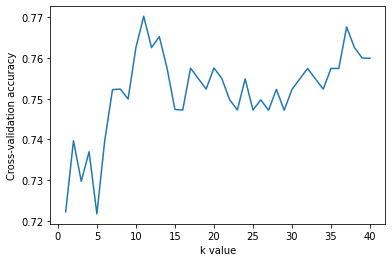

In [ ]:
#Visualizing the k value

plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [ ]:
#Looks great becase the difference is <10

In [ ]:
# Optimal value for k is 10

knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
(knn.predict(inputs_test) == outputs_test).sum()

104

In [ ]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy #76.1%

0.8

In [ ]:
# 10-fold cross-validation with knn = 3

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores #accuracy scores ranges in the arrays (from 61.5% to 84.6%)

array([0.8       , 0.8       , 0.69230769, 0.61538462, 0.69230769,
       0.84615385, 0.71794872, 0.87179487, 0.79487179, 0.79487179])

In [ ]:
scores.mean() #confirms the accuracy initially identified as 76.1% though now its at 76.26%

0.7625641025641026

In [ ]:
#Cross validation and remval of recursive features 

In [ ]:
kf = KFold(10)

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None)

In [ ]:
lg = LogisticRegression()

In [ ]:
rfecv = RFECV (estimator=lg,step=1, cv=skf, scoring='accuracy')

In [ ]:
rfecv.fit(inputs, outputs)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


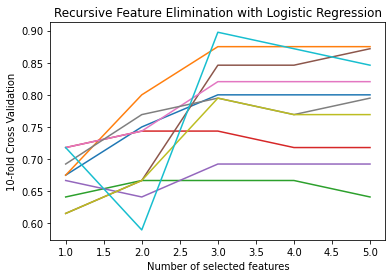

In [ ]:
plt.figure()
plt.title('Recursive Feature Elimination with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Cross Validation')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

#Optical number of features (=5) more suitable to predict the outcome

In [ ]:
#Recursive features were not eliminated from the graphical representation above!!SAd. Still figuring out 

In [ ]:
feature_names = pima_all.columns[:10]
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Nutritional Status', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [ ]:
X = pima_all[feature_names]

In [ ]:
new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True), ('SkinThickness', True), ('Insulin', True)]

In [ ]:
new_inputs = pima_all[['Pregnancies','Glucose', 'BloodPressure','SkinThickness']] #Accurary score
knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(new_inputs, outputs)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
(knn.predict(new_inputs) == outputs).sum()

304

In [ ]:
new_inputs_train, new_inputs_test, outputs_train, outputs_test = mod.train_test_split(new_inputs,outputs, test_size =0.33)
knn.fit(new_inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
(knn.predict(new_inputs_test) == outputs_test).sum()

104

In [ ]:
outputs_pred_new_inputs = knn.predict(new_inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred_new_inputs)
accuracy

0.8

In [ ]:
scores = cross_val_score (knn, new_inputs, outputs, cv =10, scoring = 'accuracy')
scores.mean()

0.7551923076923076

In [ ]:
#Logistic Regression

In [ ]:
lg = LogisticRegression()
lg_accuracy = cross_val_score(lg,inputs,outputs,cv=10,scoring='accuracy')
lg_accuracy.mean()

0.7828846153846154

In [ ]:
#Logistic Regression has a better average accuracy score than knn.
lg.fit(inputs_train,outputs_train)

LogisticRegression()

In [ ]:
outputs_pred=lg.predict(inputs_test)
accuracy_lg = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy_lg

0.7076923076923077

In [ ]:
#Naive Bayes
mnb = MultinomialNB()
mnb.fit(inputs_train, outputs_train)
out_pred = mnb.predict(inputs_test)
accuracy_mnb = accuracy_score(outputs_test, out_pred)
accuracy_mnb

0.46153846153846156

In [ ]:
#Confusion Matrix
conf_mtx_nb = metrics.confusion_matrix(outputs_test, out_pred)
conf_mtx_nb

array([[38, 54],
       [16, 22]])

In [ ]:
conf_mtx_new_features = metrics.confusion_matrix(outputs_test, outputs_pred_new_inputs)
conf_mtx_new_features

array([[81, 11],
       [15, 23]])

In [ ]:
#Precision
precision_nb = metrics.precision_score(outputs_test, out_pred)
precision_nb

0.2894736842105263

In [ ]:
out_pred_prob = mnb.predict_proba(inputs_test)[:,1]
out_pred_prob

array([9.16566716e-01, 6.87682159e-01, 8.96462030e-01, 9.57731568e-01,
       9.19935041e-01, 5.95526323e-02, 5.96002714e-01, 9.05245987e-01,
       4.88476476e-03, 3.74989411e-04, 5.02356602e-01, 9.28419970e-01,
       9.60177368e-01, 6.26908129e-01, 8.49154513e-01, 4.44580656e-03,
       9.57180618e-01, 2.72097929e-03, 8.78477228e-01, 3.74723369e-03,
       9.04454584e-01, 9.20787473e-01, 1.22124830e-09, 6.11734486e-01,
       2.86672326e-01, 7.23315500e-01, 2.74943918e-01, 8.01534575e-01,
       5.60866963e-02, 8.96858277e-01, 8.16065628e-01, 8.88351822e-01,
       5.67058816e-01, 4.81287509e-01, 1.54623222e-05, 9.18201737e-01,
       5.02725043e-02, 7.54605453e-01, 7.94392157e-01, 2.15129221e-01,
       4.86310817e-01, 9.58277006e-01, 1.61220362e-02, 8.16996884e-01,
       1.42227078e-05, 4.52028611e-02, 6.67303386e-01, 8.33619507e-01,
       2.48850793e-02, 7.55657067e-01, 6.51803942e-02, 1.09875998e-06,
       1.54348350e-01, 4.65770726e-02, 2.67158584e-02, 5.21153029e-06,
      

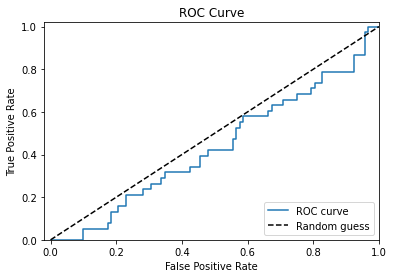

In [ ]:
fpr, tpr, thresholds = roc_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [ ]:
ras = roc_auc_score(outputs_test, out_pred_prob)
ras

0.43421052631578944

In [ ]:
#The classifier is not very good at minimizing false negatives and true negatives

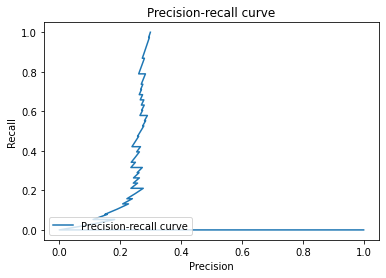

In [ ]:
precision, recall, thresholds = precision_recall_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [ ]:
aps = average_precision_score(outputs_test, out_pred_prob)
aps

0.25828514064808056